In [ ]:
# Data set used taken from Kaggle at https://www.kaggle.com/datasets/danielgrijalvas/movies?resource=download

In [34]:
# Importing libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib

import matplotlib as plt
plt.style.use('ggplot')
from matplotlib import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [14]:
# Read in the data

df = pd.read_csv(r'/Users/megangoldsworthy/Downloads/movies.csv')

In [15]:
# Check data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [18]:
#Start cleaning the data

# Check to see if any data is missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [19]:
# Check data types for each column

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [23]:
# Changing floats to ints

df['budget'] = pd.to_numeric(df['budget'], errors = 'coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors = 'coerce').fillna(0).astype(int)
df['votes'] = pd.to_numeric(df['votes'], errors = 'coerce').fillna(0).astype(int)

In [24]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [28]:
# Order by gross revenue

df.sort_values(by = ['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"8,"
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,201
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"9,"
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"8,"
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,", 1"
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,198
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,", 1"


In [45]:
# Drop any null values

df = df.dropna(how='any',axis=0)

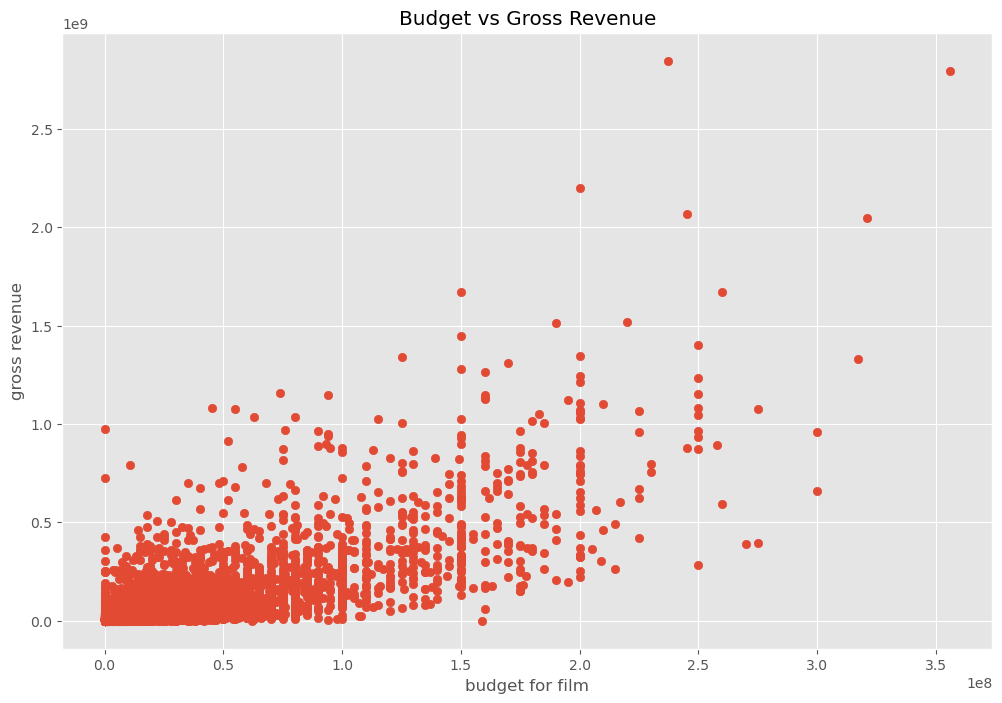

In [46]:
# Prediction: Budget and Gross are highly correlated
# Build a scatter plot to test prediction

matplotlib.pyplot.scatter(x = df['budget'], y = df['gross'])

matplotlib.pyplot.title('Budget vs Gross Revenue')

matplotlib.pyplot.xlabel('budget for film')

matplotlib.pyplot.ylabel('gross revenue')

matplotlib.pyplot.show()

<Axes: xlabel='budget', ylabel='gross'>

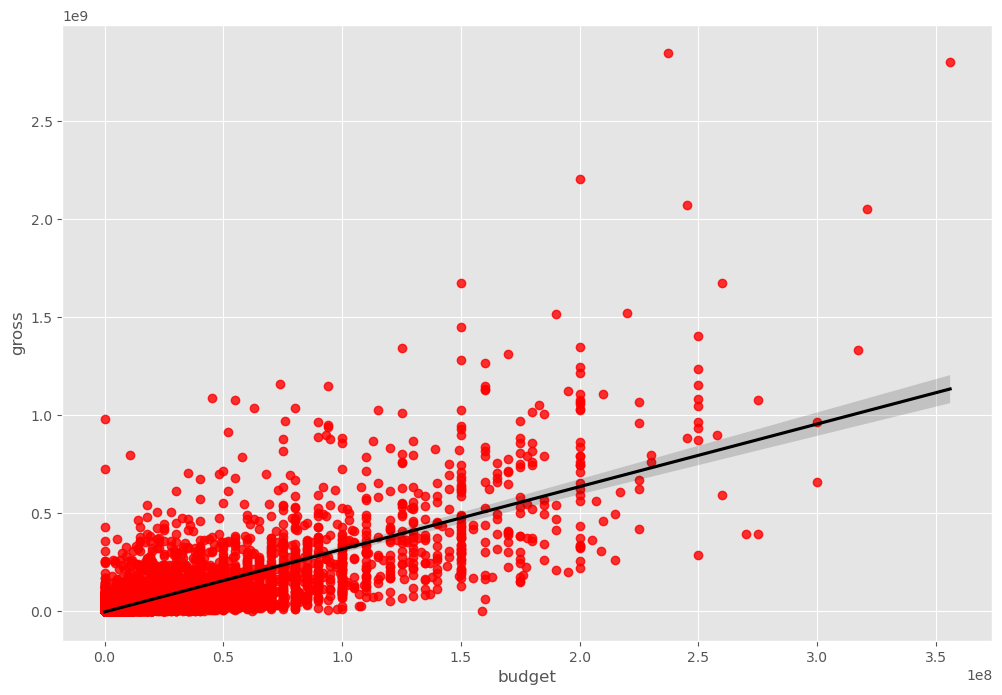

In [47]:
# Plot budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color": "red"}, line_kws = {"color": "black"})

In [48]:
# Determining actual correlation

df.corr(numeric_only = True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.102346,0.226895,0.314842,0.264716,0.120676
score,0.102346,1.000000,0.411931,0.056781,0.188259,0.400574
votes,0.226895,0.411931,1.000000,0.485301,0.632987,0.309366
budget,0.314842,0.056781,0.485301,1.000000,0.750562,0.270042
gross,0.264716,0.188259,0.632987,0.750562,1.000000,0.244942
runtime,0.120676,0.400574,0.309366,0.270042,0.244942,1.000000


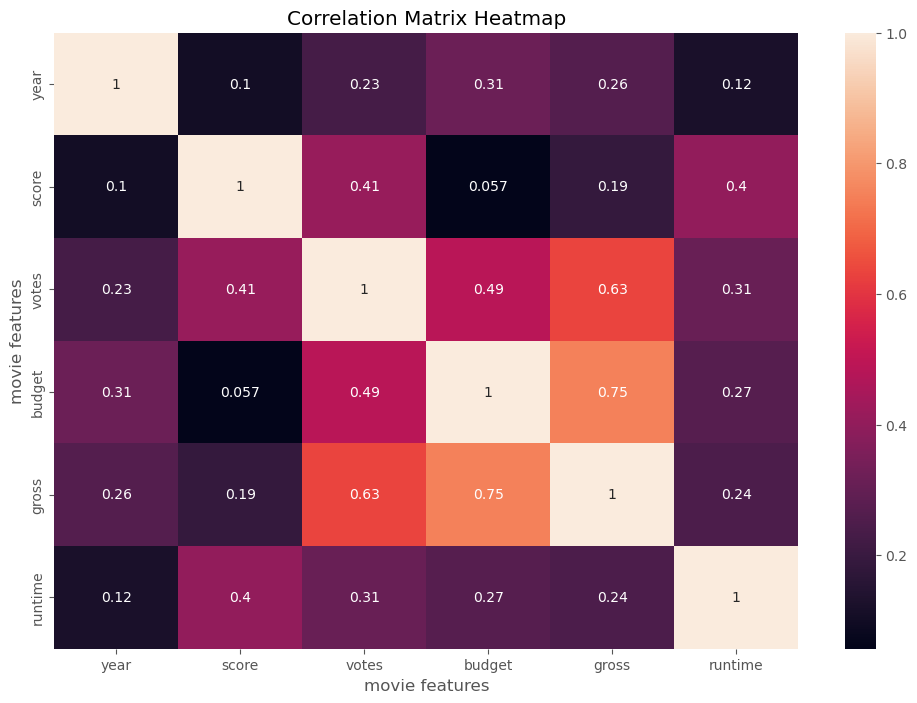

In [52]:
correlation_matrix = df.corr(numeric_only = True)

sns.heatmap(correlation_matrix, annot = True)

matplotlib.pyplot.title('Correlation Matrix Heatmap')

matplotlib.pyplot.xlabel('movie features')

matplotlib.pyplot.ylabel('movie features')

matplotlib.pyplot.show()

In [53]:
# Numericizing features to check for more correlations 

df_numericized = df

for col_name in df_numericized.columns:
    if (df_numericized[col_name].dtype == 'object'):
        df_numericized[col_name] = df_numericized[col_name].astype('category')
        df_numericized[col_name] = df_numericized[col_name].cat.codes
        
df_numericized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
0,6506,6,6,1980,1685,8.4,927000,2544,3958,1022,54,19000000,46998772,2273,146.0,114
1,5498,6,1,1980,1472,5.8,65000,2233,1612,316,55,4500000,58853106,710,104.0,93
2,5073,4,0,1980,1751,8.7,1200000,1093,2534,1708,55,18000000,538375067,1505,124.0,114
3,282,4,4,1980,1472,7.7,221000,1279,1975,2197,55,3500000,83453539,1769,88.0,93
4,1016,6,4,1980,1523,7.3,108000,1037,511,398,55,6000000,39846344,1736,98.0,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,5713,3,0,2020,490,6.8,3700,1076,1652,2747,8,80000000,461421559,360,149.0,2
7653,6399,6,5,2020,91,5.4,2400,2475,3827,2385,55,0,3661,1860,98.0,70
7656,6936,5,4,2020,1865,5.0,294,2470,3820,2326,55,0,413378,1862,120.0,66
7658,789,6,6,2020,1091,6.6,35,1739,1051,515,55,5000,0,1709,78.0,6


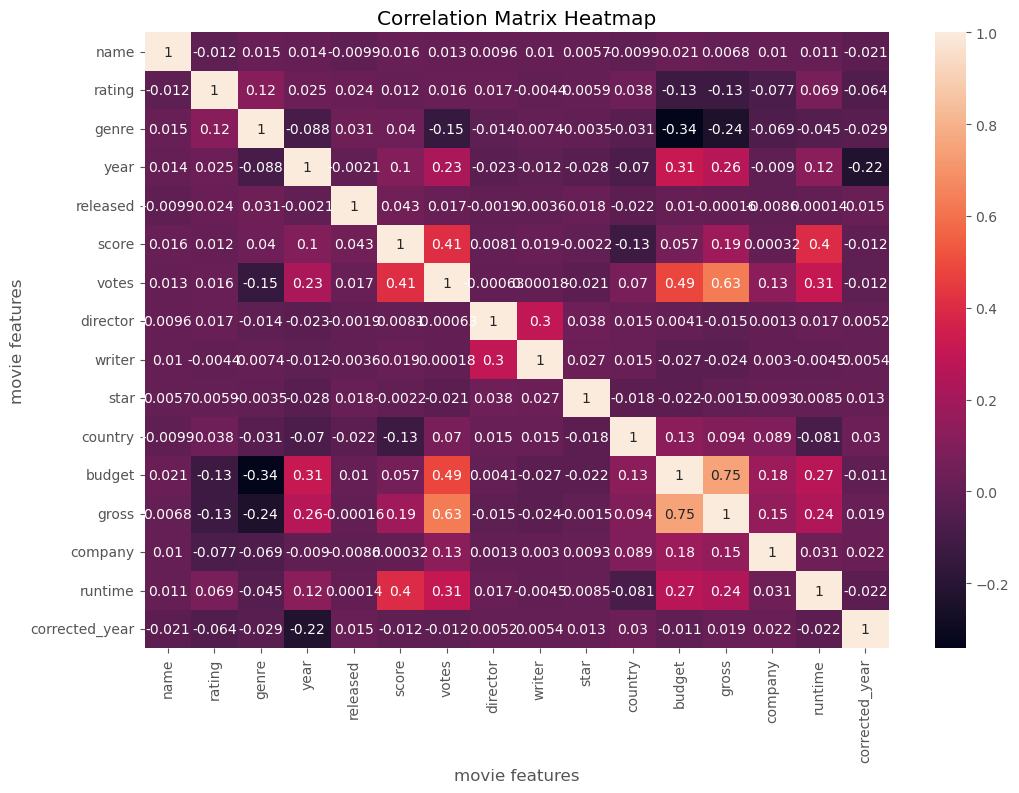

In [54]:
#Checking heatmap with updated df

correlation_matrix = df_numericized.corr(numeric_only = True)

sns.heatmap(correlation_matrix, annot = True)

matplotlib.pyplot.title('Correlation Matrix Heatmap')

matplotlib.pyplot.xlabel('movie features')

matplotlib.pyplot.ylabel('movie features')

matplotlib.pyplot.show()

In [55]:
df_numericized.corr(numeric_only = True)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
name,1.000000,-0.011924,0.015300,0.013514,-0.009906,0.016181,0.013180,0.009608,0.010217,0.005685,-0.009939,0.020825,0.006817,0.010073,0.011151,-0.020629
rating,-0.011924,1.000000,0.117566,0.024989,0.024319,0.011538,0.016086,0.017205,-0.004387,0.005905,0.037738,-0.126806,-0.128910,-0.076807,0.069089,-0.063540
genre,0.015300,0.117566,1.000000,-0.088172,0.030625,0.040090,-0.148420,-0.013508,0.007351,-0.003525,-0.031485,-0.342064,-0.240903,-0.068678,-0.044631,-0.028908
year,0.013514,0.024989,-0.088172,1.000000,-0.002088,0.102346,0.226895,-0.022765,-0.012318,-0.027691,-0.070266,0.314842,0.264716,-0.009026,0.120676,-0.222437
released,-0.009906,0.024319,0.030625,-0.002088,1.000000,0.043175,0.016877,-0.001868,-0.003569,0.018026,-0.022109,0.009995,-0.000164,-0.008570,0.000145,0.015396
score,0.016181,0.011538,0.040090,0.102346,0.043175,1.000000,0.411931,0.008071,0.019084,-0.002193,-0.130094,0.056781,0.188259,0.000316,0.400574,-0.011584
votes,0.013180,0.016086,-0.148420,0.226895,0.016877,0.411931,1.000000,-0.000627,0.000177,-0.020977,0.069582,0.485301,0.632987,0.129596,0.309366,-0.012456
director,0.009608,0.017205,-0.013508,-0.022765,-0.001868,0.008071,-0.000627,1.000000,0.297479,0.037570,0.015245,0.004140,-0.015027,0.001337,0.017386,0.005196
writer,0.010217,-0.004387,0.007351,-0.012318,-0.003569,0.019084,0.000177,0.297479,1.000000,0.026584,0.014937,-0.027145,-0.023834,0.003035,-0.004526,0.005418
star,0.005685,0.005905,-0.003525,-0.027691,0.018026,-0.002193,-0.020977,0.037570,0.026584,1.000000,-0.017626,-0.021930,-0.001470,0.009317,0.008474,0.013321


In [56]:
numericized_matrix = df_numericized.corr(numeric_only = True)

corr_pairs = numericized_matrix.unstack()

corr_pairs

name            name              1.000000
                rating           -0.011924
                genre             0.015300
                year              0.013514
                released         -0.009906
                                    ...   
corrected_year  budget           -0.010631
                gross             0.018910
                company           0.021891
                runtime          -0.021620
                corrected_year    1.000000
Length: 256, dtype: float64

In [61]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs[(sorted_pairs) > 0.5]

votes           gross             0.632987
gross           votes             0.632987
budget          gross             0.750562
gross           budget            0.750562
name            name              1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
corrected_year  corrected_year    1.000000
dtype: float64

In [ ]:
# We can see that budget and revenue were highly correlated, as well as votes and revenue.